# Perceptron Model
A perceptron is a binary classifier that predicts one of two classes (+1 or -1) using a linear decision boundary.

y(x) = f(dot(w,x))

#### Assumptions and Limitations

Linear Separability:
- The perceptron only converges if data is linearly separable.
- If not, it will fail to find a solution.

Binary Classification Only:
- Can only distinguish between two classes (+1 or -1).

Non-linearly Separable Data:
- Fails for complex patterns (e.g., XOR problem).
- Requires more advanced models like Multi-layer Perceptrons (MLPs).

Key Characteristics
- Fast and Simple: Works well for linearly separable data.
- Incremental Updates: Stochastic Gradient Descent (updates weights for each example).
- Decision Boundary: A straight line (or hyperplane) separating two classes.

Usage:
- Used as a basic model to understand machine learning concepts.
- Rarely used in practice due to limitations; replaced by MLPs, logistic regression, and SVMs.

#### Implementation

A binary classification model. It works when data is linearly separable.
- have some data
- have some random weights

---
- take one example from data,
- take dot product of example with weights,
- check if result is + or -,
- if result and exmaple are both not + or -, (example is + and result is neg)
- update weights (stochastic gradient descent) by simply moving to right direction,
- if result it - and example is +, move to + direction, weight += example
- else if result it + and example is -, move to - direction, weight -= example
- repeat several times


In [35]:
import numpy as np
import random

In [43]:
class PerceptronModel():
  def __init__(self, features, rate, iterations):
    self.features = features
    self.rate = rate
    self.iterations = iterations

    self.weights = np.random.rand(self.features, 1) # random weights

  def fit(self, pos_eg, neg_eg):
    pos_count = pos_eg.shape[0]
    neg_count = neg_eg.shape[0]
    
    for i in range(self.iterations):
      pos = random.choice(pos_eg)
      neg = random.choice(neg_eg)
      
      z = np.dot(pos, self.weights)

      if z < 0: # pos example was classified as negative
        self.weights = self.weights + pos.reshape(self.weights.shape) 
      
      z = np.dot(neg, self.weights)
      
      if z >= 0: # neg example was classified as positive
        self.weights = self.weights - neg.reshape(self.weights.shape)
        
      if i % 10 == 0:             
          pos_out = np.dot(pos_eg, self.weights)
          neg_out = np.dot(neg_eg, self.weights)        
          pos_correct = (pos_out >= 0).sum() / float(pos_count)
          neg_correct = (neg_out < 0).sum() / float(neg_count)
          print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct* 100,neg_correct * 100))

  def predict(self, features):
    z = np.dot(features, self.weights)
    return 1 if z > 0 else -1

Let's create random dataset using sckit-learn library.

In [33]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 100, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0)

Y = Y*2-1 # convert 0 to -1

print(X, Y)

# set features type to float and label to int
X = X.astype(np.float32); Y = Y.astype(np.int32)

[[ 0.29128978 -1.47185189]
 [-0.33424229 -1.2315863 ]
 [ 0.53976522  0.61704116]
 [-2.17734049  0.63308906]
 [ 0.64542576 -1.69781104]
 [ 0.47029174 -1.34473857]
 [ 0.27168448  0.68351146]
 [-1.74161396 -0.59592008]
 [-1.24632214 -1.11972833]
 [ 0.39025359 -1.12721237]
 [ 0.03088723  0.27364626]
 [-0.79680592  1.66878238]
 [-2.15659907 -0.45052786]
 [ 0.59804908  1.66983793]
 [ 0.76406452  0.82235476]
 [-0.88910156 -0.86514723]
 [-1.25653279 -0.10749963]
 [ 1.02182426 -0.52632802]
 [-1.11118806  0.98861641]
 [-0.16248687 -1.46230351]
 [ 1.52098542  1.31003651]
 [ 1.23608947 -0.06116893]
 [ 1.37045137 -1.14705528]
 [ 0.41248581 -0.61340396]
 [-0.35175888  0.53525739]
 [ 1.8598189   0.3156883 ]
 [ 0.62750854 -1.72401964]
 [-1.15356804  2.75803186]
 [ 1.08056788 -1.20176781]
 [-0.22781962  1.66513028]
 [ 1.14581502  0.10915033]
 [-1.6905848  -0.7273697 ]
 [ 0.56237409 -1.43587426]
 [ 0.9725982   0.50882084]
 [-3.26362431 -0.20804265]
 [-2.16936947 -0.44874057]
 [ 1.69583939  1.64828085]
 

In [34]:
# Splitting the dataset into training and testing
train_x, test_x = np.split(X, [100*7//10]) # 7:3 ratio training and testing
train_y, test_y = np.split(Y, [100*7//10]) # 7:3 ratio training and testing

print("Features:", train_x[:4])
print("Labels:", train_y[:4])

Features: [[ 0.29128978 -1.471852  ]
 [-0.33424228 -1.2315863 ]
 [ 0.53976524  0.6170412 ]
 [-2.1773405   0.63308907]]
Labels: [-1 -1  1 -1]


Let's visualize the dataset

/var/folders/tt/sm61w5f551qgbmfz15lw2dmh0000gn/T/ipykernel_78510/376533407.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


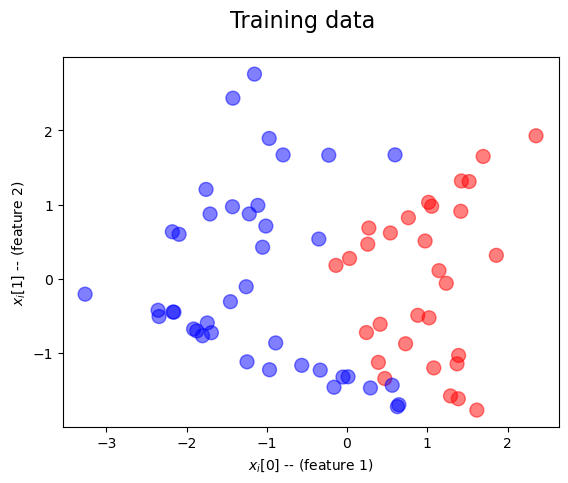

In [36]:
import pylab

def plot_dataset(suptitle, features, labels):
    # prepare the plot
    fig, ax = pylab.subplots(1, 1)
    fig.suptitle(suptitle, fontsize = 16)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')

    colors = ['r' if l>0 else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    fig.show()

plot_dataset('Training data', train_x, train_y)

Let's divide the examples, into pos and neg



In [53]:
pos_examples = np.array([ [t[0], t[1]] for i,t in enumerate(train_x) 
                          if train_y[i]>0])
neg_examples = np.array([ [t[0], t[1]] for i,t in enumerate(train_x) 
                          if train_y[i]<0])

print(pos_examples[0:3])

[[ 0.53976524  0.6170412 ]
 [ 0.47029173 -1.3447386 ]
 [ 0.27168447  0.68351144]]


In [54]:
p = PerceptronModel(2, 0.1, 1000)
p.fit(pos_examples, neg_examples)

Iteration=0, pos correct=86.66666666666667, neg correct=77.5
Iteration=10, pos correct=86.66666666666667, neg correct=87.5
Iteration=20, pos correct=90.0, neg correct=80.0
Iteration=30, pos correct=93.33333333333333, neg correct=87.5
Iteration=40, pos correct=96.66666666666667, neg correct=87.5
Iteration=50, pos correct=96.66666666666667, neg correct=87.5
Iteration=60, pos correct=86.66666666666667, neg correct=82.5
Iteration=70, pos correct=86.66666666666667, neg correct=87.5
Iteration=80, pos correct=76.66666666666667, neg correct=82.5
Iteration=90, pos correct=96.66666666666667, neg correct=87.5
Iteration=100, pos correct=96.66666666666667, neg correct=85.0
Iteration=110, pos correct=93.33333333333333, neg correct=80.0
Iteration=120, pos correct=96.66666666666667, neg correct=87.5
Iteration=130, pos correct=96.66666666666667, neg correct=85.0
Iteration=140, pos correct=96.66666666666667, neg correct=85.0
Iteration=150, pos correct=96.66666666666667, neg correct=85.0
Iteration=160, p

In [63]:
total = len(test_y)
correct = 0

for n in range(len(test_y)):
  pr = p.predict(test_x[n])
  if pr == test_y[n]:
    correct += 1

print("total: ", len(test_y))
print("correct: ", correct)
print("accuracy:", correct / total * 100, "%")


total:  30
correct:  28
accuracy: 93.33333333333333 %
